In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1a: Principle Component and Transformed Space

In [2]:
X = np.loadtxt("q1adata.txt", delimiter=" ", unpack=True)

## 1.) Calculation and plot for $e_1$ and $e_2$

In [3]:
m = np.mean(X, axis=1)
X_ms = X.T - m
C = X_ms.T @ X_ms / len(X_ms)
# np.linalg.eigh returns respective eigenvectors from lowest to highest eigenvalues
w, V = np.linalg.eig(C)
V = np.array([V[:, i] for i in np.argsort(w)]).T
# By observation in w, largest eigenvalue is in last column
print("e1 = " + str(V[:, -1]))
print("e2 = " + str(V[:, -2]))

e1 = [-0.6778734  -0.73517866]
e2 = [-0.73517866  0.6778734 ]


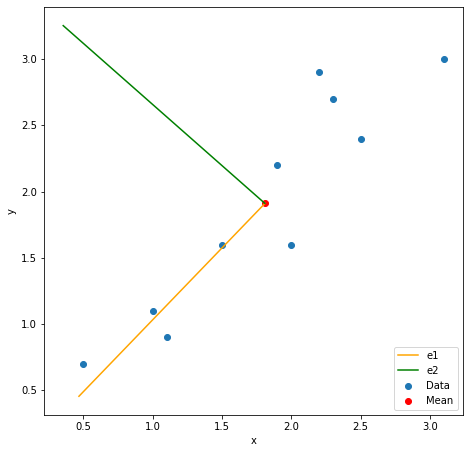

In [4]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(X[0, :], X[1, :], label="Data")
plt.plot(m[0] + V[0, -1] * 0.02 * np.arange(100), m[1] + V[1, -1] * 0.02 * np.arange(100), label='e1', c="orange")
plt.plot(m[0] + V[0, -2] * 0.02 * np.arange(100), m[1] + V[1, -2] * 0.02 * np.arange(100), label='e2', c = "g")
plt.scatter(m[0], m[1], c='r', label='Mean')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 2.) Transformation of data onto principal components plane

In [5]:
a1 = X_ms @ np.array([V[0, -1], V[1, -1]])
a2 = X_ms @ np.array([V[0, -2], V[1, -2]])
print(np.c_[a1, a2])

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


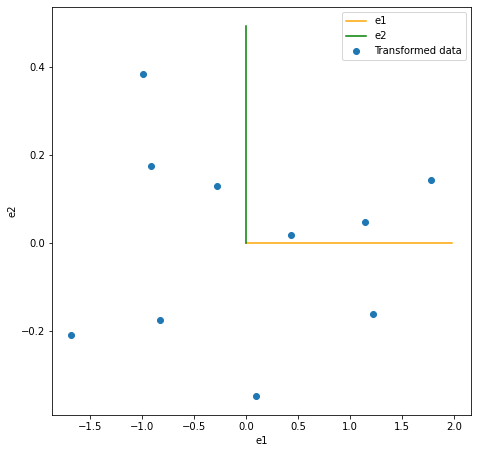

In [6]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(0.02 * np.arange(100), np.zeros((100, 1)), c="orange", label="e1")
plt.plot(np.zeros((100, 1)), 0.005 * np.arange(100), c="g", label="e2")
plt.scatter(a1, a2, label="Transformed data")
plt.xlabel("e1")
plt.ylabel("e2")
plt.legend()
plt.show()

## 3.) PCA-optimal one-dimensional representation of data

The PCA-optimal one-dimensional representation is described using the first principal component (eigenvector of the highest eigenvalue). The variable used to describe the original data in this space is the distance between the data and the data mean, which is assigned as $a_1$. The range of the new variable is calculated below.

In [19]:
print("Range distance = {}".format(np.abs(a1.min() - a1.max())))

Range distance = 3.453381743924969


# Q1b: Principle Component Analysis

In [8]:
data = np.loadtxt("q1bdata.txt", delimiter="\t", unpack=True)

## 1.) Compute the 4x4 inner matrix and find all non-zero eigenvectors

In [9]:
# Mean shifting data
phi = np.mean(data, axis=1)
A = data - phi[:, np.newaxis]

In [10]:
# Inner product matrix
cov = A.T @ A
print(cov)

[[ 69.875 -18.875 -26.375 -24.625]
 [-18.875 121.375 -53.125 -49.375]
 [-26.375 -53.125  98.375 -18.875]
 [-24.625 -49.375 -18.875  92.875]]


In [11]:
# Eigenvector of inner product matrix
w, V = np.linalg.eig(cov)

# Respective eigenvectors in ascending eigenvalues
V = np.array(V[:, np.argsort(w)])
print(V)

[[-0.5        -0.86249959  0.04124587 -0.06628148]
 [-0.5         0.34733208 -0.06822502 -0.79038331]
 [-0.5         0.22046165 -0.69123739  0.47285044]
 [-0.5         0.29470586  0.71821654  0.38381435]]


In [12]:
# Check if eigenvector columns are normalized
check = np.linalg.norm(V, axis=0)
print(check)

[1. 1. 1. 1.]


There are 4 non-zero eigenvectors.

## 2.) Projection onto a reduced 3D space

In [13]:
# Eigenfaces
u3 = A @ V[:, 1::]
u3 = np.divide(u3, np.linalg.norm(u3, axis=0))
# Check if eigenfaces are normalized
check = np.linalg.norm(u3, axis = 0)
print(check)

[1. 1. 1.]


In [14]:
# Conversion/Projection of face into eigenface space
w3 = (u3.T @ A).T
print(w3)

[[ -8.3011616    0.44099733  -0.8782013 ]
 [  3.34291139  -0.72945617 -10.47224127]
 [  2.12184196  -7.39065157   6.26506632]
 [  2.83640825   7.67911041   5.08537624]]


## 3.) Determine MSE between reconstruction from reduced space and original data

In [15]:
# Reconstructed image from the eigenface space
gamma3 = u3 @ w3.T + phi[:, np.newaxis]
MSE = np.mean(np.power(gamma3.T - data.T, 2), axis=1)
print("MSE = {}".format(MSE))

MSE = [6.93496964e-31 2.34144426e-30 2.94603600e-30 9.42228573e-31]


## 4.) Repeat part (3), but reduce data into 2D space

In [16]:
u2 = A @ V[:, 2::]
u2 = np.divide(u2, np.linalg.norm(u2, axis=0))
w2 = (u2.T @ A).T
gamma2 = u2 @ w2.T + phi[:, np.newaxis]
MSE = np.mean(np.power(gamma2.T - data.T, 2), axis=1)
print("MSE = {}".format(MSE))

MSE = [3.62680441 0.58816087 0.2369586  0.4234322 ]


## 5.) Euclidean distance between the new data vector and reconstruction using 3D feature space

In [17]:
Y = np.array([1, 3, 0, 3, -2, 2, 4, 1, 3, 0, -2, 0, 1, 1, -3, 0, 1, -2, -3])[:, np.newaxis]
dist = np.linalg.norm(Y - gamma3, axis=0)
print(dist)

[12.92284798  5.65685425 16.79285562 15.77973384]


From results above, the 2nd sample seems to be the most similar to the given vector.

## 6.) Euclidean distance between the new data vector and original data

In [18]:
dist2 = np.linalg.norm(Y - data, axis=0)
print(dist2)

[12.92284798  5.65685425 16.79285562 15.77973384]


The results match since it makes sense that the 3D feature space is merely a reconstruction of the original dataset in a lower dimension, so the distance relationship should not be affected if enough percentage of the original data's variance is captured.